# Testing the `DelayPart` Class

This notebook demonstrates how to use the `DelayPart` class for modifying a signal by shifting a windowed part of it. We will create a signal, apply the `DelayPart` module, and visualize the results.

In [1]:
# Import necessary libraries
import torch
import matplotlib.pyplot as plt
from virtual_anomaly import DelayPart  # Replace 'virtual_anomaly' with the actual module name

## Create a Simulated Signal

We will create a simple signal composed of multiple sine waves and some added noise.

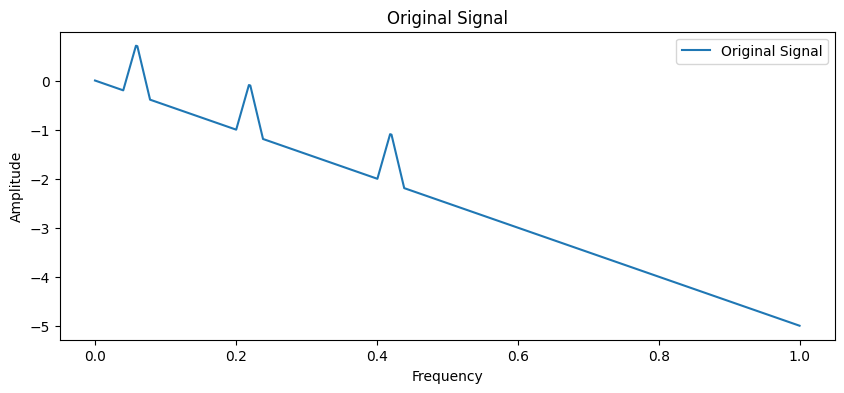

In [6]:
# Simulate a data axis (e.g., frequency axis)
data_axis = torch.linspace(0, 1, 500)  # Simulated data axis (e.g., frequency)
# make a chainsaw-like signal 
signal = torch.linspace(0, -5, 500)
spike = torch.cat((torch.linspace(0, 1, 10), torch.linspace(1,0, 10)))
signal[20:40] += spike
signal[100:120] += spike
signal[200:220] += spike

# Plot the original signal
plt.figure(figsize=(10, 4))
plt.plot(data_axis, signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

## Apply the `DelayPart` Module

We will create an instance of `DelayPart` and apply it to our simulated signal.

In [14]:
# Instantiate the DelayPart module
delay_part = DelayPart(
    data_axis=data_axis,
    window_center=0.2,
    delay=0.05,
    window_size=0.05
)

# Apply the DelayPart module to the signal
output_signal = delay_part(signal)
delay_part.remove_artifacts = True
output_signal_rm = delay_part(signal)


## Visualize the Results

Finally, we will plot the original signal and the modified signal after applying the `DelayPart` module to see the effect of the delay.

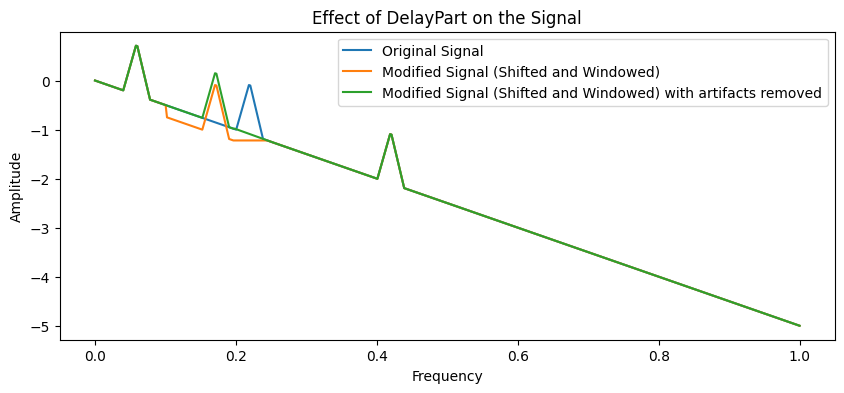

In [15]:
# Plot the original and modified signals
plt.figure(figsize=(10, 4))
plt.plot(data_axis, signal, label='Original Signal')
plt.plot(data_axis, output_signal, label='Modified Signal (Shifted and Windowed)')
plt.plot(data_axis, output_signal_rm, label='Modified Signal (Shifted and Windowed) with artifacts removed')
plt.title('Effect of DelayPart on the Signal')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.show()